# Assignment 1-a: Deep Learning Hello World! (Baseline)

Objective: To be able to implement a basic MLP in Keras for MNIST Classification

Step 1: Taking care of the imports which includes numpy, datasets, models, layers, optimizers, and utils. <br />
You will also be able to tell if your set-up is correct/complete.

In [28]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

from matplotlib import pyplot as plt
%matplotlib inline

Step 2: Set-up some constants to be utilized in the training/testing of the model

In [20]:
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits, i.e. 0,1,2,3,4,5,6,7,8,9
OPTIMIZER = SGD() # Stocastic Gradient Descent optimizer
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN dataset is reserved for VALIDATION

np.random.seed(1983)  # for reproducibility

Step 3: Load the MNIST Dataset which are shuffled and split between train and test sets <br\>
- X_train is 60000 rows of 28x28 values
- X_test is 10000 rows of 28x28 values

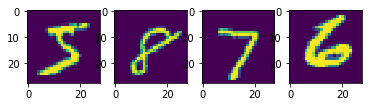

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.subplot(1, 4, 1)
plt.imshow(X_train[0])        # first train
plt.subplot(1, 4, 2)
plt.imshow(X_train[59999])    # last train
plt.subplot(1, 4, 3)
plt.imshow(X_test[0])         # first test 
plt.subplot(1, 4, 4)
plt.imshow(X_test[9999])      # last test  

Step 4: Preprocess the input data by reshaping it, converting it to float, and normalizing it [0-1].

In [22]:
# reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


Step 5: Convert class vectors to binary class matrices; One-Hot-Encoding (OHE)

In [23]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

Step 6: Create the model: Input:784 ==> Output:10 (with Softmax activation)

In [24]:
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(784,)))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Step 7: Compile the model with categorical_crossentropy loss function, SGD optimizer, and accuracy metric

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

Step 8: Perform the training with 128 batch size, 200 epochs, and 20 % of the train data used for validation

In [26]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s - loss: 1.4054 - acc: 0.6486 - val_loss: 0.9016 - val_acc: 0.8237
Epoch 2/200
48000/48000 [==============================] - 1s - loss: 0.7984 - acc: 0.8248 - val_loss: 0.6587 - val_acc: 0.8559
Epoch 3/200
48000/48000 [==============================] - 1s - loss: 0.6451 - acc: 0.8484 - val_loss: 0.5609 - val_acc: 0.8706
Epoch 4/200
48000/48000 [==============================] - 1s - loss: 0.5713 - acc: 0.8606 - val_loss: 0.5073 - val_acc: 0.8788
Epoch 5/200
48000/48000 [==============================] - 1s - loss: 0.5265 - acc: 0.8677 - val_loss: 0.4729 - val_acc: 0.8836
Epoch 6/200
48000/48000 [==============================] - 1s - loss: 0.4958 - acc: 0.8736 - val_loss: 0.4488 - val_acc: 0.8872
Epoch 7/200
48000/48000 [==============================] - 1s - loss: 0.4733 - acc: 0.8779 - val_loss: 0.4305 - val_acc: 0.8902
Epoch 8/200
48000/48000 [=============================

48000/48000 [==============================] - 1s - loss: 0.3105 - acc: 0.9139 - val_loss: 0.2988 - val_acc: 0.9167
Epoch 65/200
48000/48000 [==============================] - 1s - loss: 0.3098 - acc: 0.9140 - val_loss: 0.2983 - val_acc: 0.9162
Epoch 66/200
48000/48000 [==============================] - 1s - loss: 0.3093 - acc: 0.9140 - val_loss: 0.2978 - val_acc: 0.9171
Epoch 67/200
48000/48000 [==============================] - 1s - loss: 0.3088 - acc: 0.9143 - val_loss: 0.2974 - val_acc: 0.9169
Epoch 68/200
48000/48000 [==============================] - 1s - loss: 0.3082 - acc: 0.9141 - val_loss: 0.2970 - val_acc: 0.9172
Epoch 69/200
48000/48000 [==============================] - 1s - loss: 0.3076 - acc: 0.9144 - val_loss: 0.2967 - val_acc: 0.9172
Epoch 70/200
48000/48000 [==============================] - 1s - loss: 0.3071 - acc: 0.9148 - val_loss: 0.2963 - val_acc: 0.9176
Epoch 71/200
48000/48000 [==============================] - 1s - loss: 0.3066 - acc: 0.9147 - val_loss: 0.2958

48000/48000 [==============================] - 1s - loss: 0.2877 - acc: 0.9198 - val_loss: 0.2825 - val_acc: 0.9216
Epoch 128/200
48000/48000 [==============================] - 1s - loss: 0.2875 - acc: 0.9199 - val_loss: 0.2823 - val_acc: 0.9212
Epoch 129/200
48000/48000 [==============================] - 1s - loss: 0.2873 - acc: 0.9199 - val_loss: 0.2822 - val_acc: 0.9212
Epoch 130/200
48000/48000 [==============================] - 1s - loss: 0.2871 - acc: 0.9201 - val_loss: 0.2820 - val_acc: 0.9216
Epoch 131/200
48000/48000 [==============================] - 1s - loss: 0.2868 - acc: 0.9202 - val_loss: 0.2819 - val_acc: 0.9214
Epoch 132/200
48000/48000 [==============================] - 1s - loss: 0.2867 - acc: 0.9200 - val_loss: 0.2817 - val_acc: 0.9216
Epoch 133/200
48000/48000 [==============================] - 1s - loss: 0.2864 - acc: 0.9199 - val_loss: 0.2815 - val_acc: 0.9217
Epoch 134/200
48000/48000 [==============================] - 1s - loss: 0.2862 - acc: 0.9202 - val_loss:

48000/48000 [==============================] - 1s - loss: 0.2771 - acc: 0.9230 - val_loss: 0.2758 - val_acc: 0.9232
Epoch 191/200
48000/48000 [==============================] - 1s - loss: 0.2770 - acc: 0.9230 - val_loss: 0.2757 - val_acc: 0.9232
Epoch 192/200
48000/48000 [==============================] - 1s - loss: 0.2768 - acc: 0.9229 - val_loss: 0.2756 - val_acc: 0.9236
Epoch 193/200
48000/48000 [==============================] - 1s - loss: 0.2767 - acc: 0.9230 - val_loss: 0.2756 - val_acc: 0.9234
Epoch 194/200
48000/48000 [==============================] - 1s - loss: 0.2766 - acc: 0.9229 - val_loss: 0.2755 - val_acc: 0.9234
Epoch 195/200
48000/48000 [==============================] - 1s - loss: 0.2765 - acc: 0.9231 - val_loss: 0.2754 - val_acc: 0.9237
Epoch 196/200
48000/48000 [==============================] - 1s - loss: 0.2764 - acc: 0.9232 - val_loss: 0.2754 - val_acc: 0.9237
Epoch 197/200
48000/48000 [==============================] - 1s - loss: 0.2762 - acc: 0.9230 - val_loss:

Step 9: Evaluate the model on the test dataset (10,000 images)

In [27]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9856/10000 [============================>.] - ETA: 0s
Test score: 0.276437405369
Test accuracy: 0.9228


[Optional] Step 10: Save the model (serialized) to JSON

In [38]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7252-C405

 Directory of C:\Users\cobalt\workspace

09/17/2017  12:53 PM    <DIR>          .
09/17/2017  12:53 PM    <DIR>          ..
09/16/2017  11:08 PM    <DIR>          .ipynb_checkpoints
01/07/2017  12:22 PM    <DIR>          .metadata
09/17/2017  12:53 PM            48,179 DeepLearningHelloWorld.ipynb
01/08/2017  10:52 AM    <DIR>          Hello
01/08/2017  10:52 AM    <DIR>          Hellocpp11
01/09/2017  04:45 PM    <DIR>          HelloOpenCV
09/17/2017  12:53 PM               723 model.json
01/07/2017  12:22 PM    <DIR>          RemoteSystemsTempFiles
               2 File(s)         48,902 bytes
               8 Dir(s)  199,888,052,224 bytes free


[Optional] Step 11: Save the model weights

In [40]:
model.save_weights("model.h5")
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7252-C405

 Directory of C:\Users\cobalt\workspace

09/17/2017  01:07 PM    <DIR>          .
09/17/2017  01:07 PM    <DIR>          ..
09/16/2017  11:08 PM    <DIR>          .ipynb_checkpoints
01/07/2017  12:22 PM    <DIR>          .metadata
09/17/2017  12:55 PM            47,588 DeepLearningHelloWorld.ipynb
01/08/2017  10:52 AM    <DIR>          Hello
01/08/2017  10:52 AM    <DIR>          Hellocpp11
01/09/2017  04:45 PM    <DIR>          HelloOpenCV
09/17/2017  01:07 PM            42,528 model.h5
09/17/2017  12:53 PM               723 model.json
01/07/2017  12:22 PM    <DIR>          RemoteSystemsTempFiles
               3 File(s)         90,839 bytes
               8 Dir(s)  199,868,473,344 bytes free


[Optional] Step 12: Load the saved model

In [41]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

[Optional] Step 13: Compile and evaluate loaded model

In [43]:
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9440/10000 [===========================>..] - ETA: 0s
Test score: 0.276437405369
Test accuracy: 0.9228
